# Jaynesの切断指数分布モデルに関する不適切な議論

* 黒木玄
* 2022-09-28
$
\newcommand\R{{\mathbb R}}
\newcommand\op{\operatorname}
$

__要約:__ 文献 Jaynes (1976)

* E. T. Jaynes, Confidence Intervals vs Bayesian Intervals, 1976. \[[doi](https://doi.org/10.1007/978-94-010-1436-6_6)\] \[[pdf](https://bayes.wustl.edu/etj/articles/confidence.pdf)\]

の(b) Example 5にあるに切断指数分布モデルの下限に関する通常の信頼区間とBayesianの信用区間の不適切な比較の仕方を, 以下のリンク先で引用している:

* Frequentism and Bayesianism III: Confidence, Credibility, and why Frequentism and Science do not Mix, 2014. \[[html](http://jakevdp.github.io/blog/2014/06/12/frequentism-and-bayesianism-3-confidence-credibility/)\]
* Alex Pizzuto and Austin Schneider, Statistical Methods for Analysis, IceCube Bootcamp Summer 2020. \[[pdf](https://events.icecube.wisc.edu/event/123/contributions/6441/attachments/5491/6311/Statistical_Methods_for_Analysis.pdf)\]

信頼区間の側の構成の仕方がおかしいので, 非Bayesianの側に不公平な議論になってしまっている.

切断指数分布モデルにおける通常の信頼区間と平坦事前分布に関するBayesianの信用区間はぴったり一致する. ぴったり一致する区間に優劣を付けることは不可能である.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#切断指数分布モデルのBayes統計" data-toc-modified-id="切断指数分布モデルのBayes統計-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>切断指数分布モデルのBayes統計</a></span></li><li><span><a href="#Jaynesによる不適切な信頼区間の構成" data-toc-modified-id="Jaynesによる不適切な信頼区間の構成-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Jaynesによる不適切な信頼区間の構成</a></span></li><li><span><a href="#適切な信頼区間の構成法" data-toc-modified-id="適切な信頼区間の構成法-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>適切な信頼区間の構成法</a></span></li></ul></div>

In [1]:
using Distributions
using Optim
using QuadGK
using SpecialFunctions
using StatsPlots
default(fmt=:png, titlefontsize=10, plot_titlefontsize=10,
    guidefontsize=9, tickfontsize=6)

## 切断指数分布モデルのBayes統計

以下で扱う統計モデルのパラメータは実数 $\theta$ の1つである.

データ $x=(x_1,\ldots,x_n)$ ($n$ 個の実数の組)に関する切断指数分布モデルの尤度函数 $p(x|\theta)$ は次のように定義される:

$$
p(x|\theta) = \prod_{i=1}^n p(x_i|\theta).
$$

ここで,

$$
p(x_i|\theta) = \begin{cases}
0 & (x_i < 0) \\
e^{-(x_i-\theta)} & (x_i \ge 0). \\
\end{cases}
$$

尤度函数を整理して書き直すために次のようにおく:

$$
\min(x) = \min(x_1,\ldots,x_n), \quad
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i.
$$

このとき,

$$
p(x|\theta) = \begin{cases}
0 & (\min(x) < \theta) \\
e^{-n(\bar{x}-\theta)} & (\min(x) \ge \theta). \\
\end{cases}
$$

これは次のように書き直される:

$$
p(x|\theta) = (\text{independent of $\theta$}) \times
\begin{cases}
0 & (\min(x) < \theta) \\
ne^{-n(\min(x)-\theta)} & (\min(x) \ge \theta). \\
\end{cases}
$$

ここで

$$
\int_{\min(x)}^\infty ne^{-n(\min(x)-\theta)}\,d\theta = 1
$$

となっていることに注意せよ.

このことから, 平坦事前分布に関する以上のモデルの事後分布 $p(\theta|x)$ は次になることがわかる:

$$
p(\theta|x) = \begin{cases}
0 & (\min(x) < \theta) \\
ne^{-n(\min(x)-\theta)} & (\min(x) \ge \theta). \\
\end{cases}
$$

すなわち, $\theta$ が事後分布に従う確率変数ならば

$$
\theta \sim \min(x) - \op{Exponential}(1/n).
$$

$x=(12, 14, 16)$ の場合のこの事後分布のグラフを描くと次のセルのようになる:

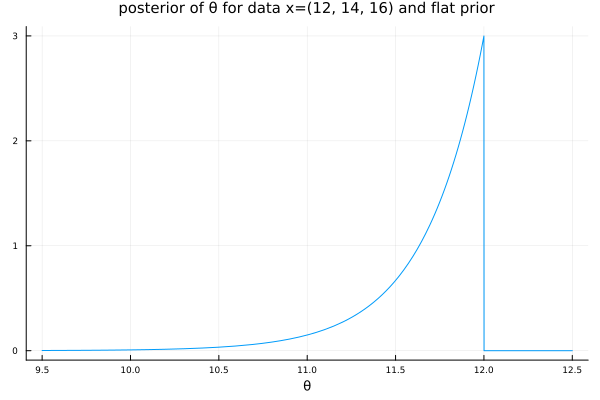

In [2]:
function pdf_posterior(θ, x)
    n, t = length(x), minimum(x)
    t < θ ? float(zero(θ)) : n*exp(-n*(t - θ))
end

x = (12, 14, 16)
plot(θ -> pdf_posterior(θ, x), 9.5, 12.5; label="")
title!("posterior of θ for data x=$x and flat prior")
plot!(xguide="θ")

$0< \alpha \le 1$ と仮定し, $c\ge 0$ を次の条件によって定める:

$$
e^{-nc} = \alpha, \quad c = -\frac{1}{n}\log \alpha
$$

このとき, 上の事後分布の最高密度区間(HDI, highest density interval)としての90%Bayesianの信用区間(credible interval)は

$$
[\min(x) - c, \min(x)]
$$

になる.

$\alpha = 10\%$ のとき, $c \approx 0.7675\cdots$ なので, $x=(12, 14, 16)$ の場合には,

$$
[\min(x) - c, \min(x)] \approx [11.23, 12].
$$

これは次のセルに引用する文献Jaynes (1976)の結論に等しい.

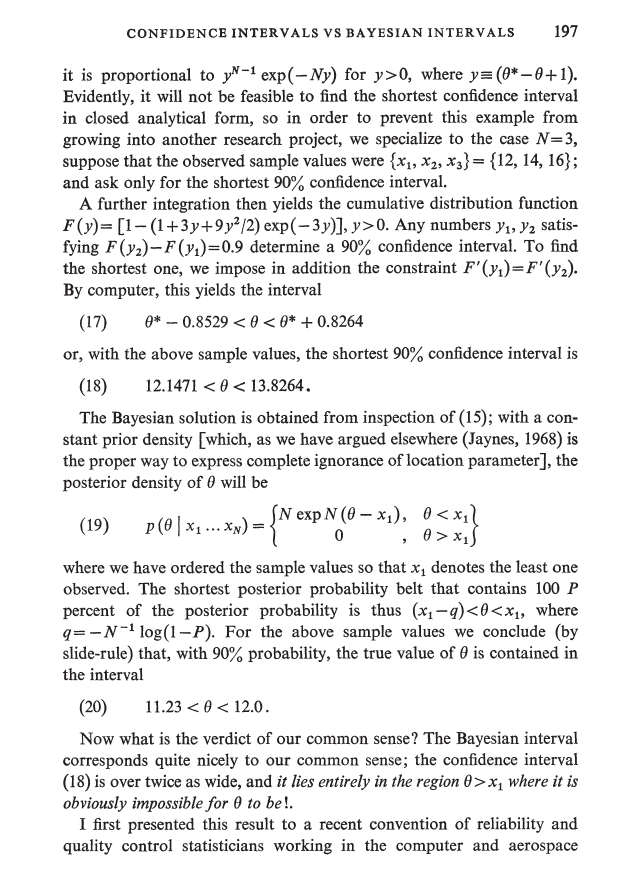

n = length(x) = 3
t = minimum(x) = 12
α = 0.1 = 0.1
c = (-1 / n) * log(α) = 0.7675283643313484
credint = credint_truncexp(x, α) = [11.232471635668652, 12.0]


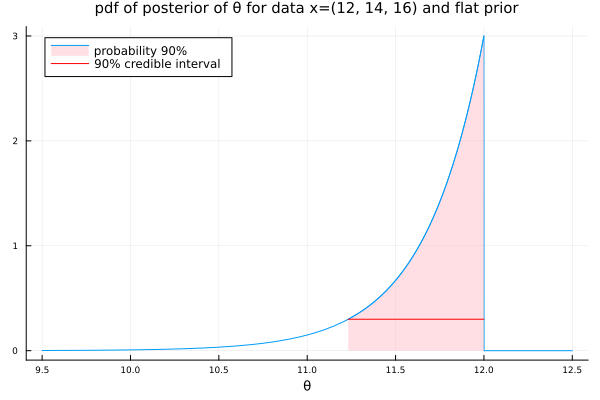

In [3]:
function credint_truncexp(x, α = 0.05)
    n, t = length(x), minimum(x)
    c = -(1/n)*log(α)
    [t - c, t]
end

@show n = length(x)
@show t = minimum(x)
@show α = 0.10
@show c = -1/n * log(α)
@show credint = credint_truncexp(x, α)

P_post = plot()
plot!(θ -> pdf_posterior(θ, x), 9.5, 12.5; label="")
title!("pdf of posterior of θ for data x=$x and flat prior")
plot!(xguide="θ")
plot!(θ -> pdf_posterior(θ, x), credint...;
    label="probability 90%", c=1, fc=:pink, fa=0.5, fillrange=0)
plot!(credint, fill(pdf_posterior(credint[begin], x), 2);
    label="90% credible interval", c=:red)
plot!(legend=:topleft)

## Jaynesによる不適切な信頼区間の構成

以下, 確率変数 $X=(X_1,\ldots,X_n)$ が従う分布の確率密度函数は $p(x|\theta)$ であると仮定する. 

このとき, $X$ の標本平均 $\bar{X}$ が従う確率分布は次のようになる:

$$
\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i \sim \theta + \op{Gamma}(n, 1/n).
$$

特に $E[\bar{X}] = \theta + 1$ となるので, 

$$
\theta^* = \bar{X}-1
$$

は $\theta$ の不偏推定量になる. さらに, $\bar{X}$ の分散は $\op{var}(\bar{X}) = 1/n$ になので, $\theta^* = \bar{X}-1$ は $\theta$ の一致推定量にもなっている.

$Y = \theta^* + 1 - \theta = \bar{X} - \theta$ が従う分布 $\op{Gamma}(n, 1/n)$ の確率密度函数は次のように書ける:

$$
p(y) = \begin{cases}
0 & (y < 0) \\
(n^n/\Gamma(n))\, y^{n-1}e^{-ny} & (y \ge 0).
\end{cases}
$$

$n = 3$ のとき, この $Y = \bar{X} - \theta$ が従う分布の90%最高密度区間は次になる:

$$
0.14710896409415852 \le Y = \bar{X} - \theta \le 1.8263915697442574.
$$

$X$ の実現値が $x = (12, 14, 16)$ のとき, $\bar{X}$ の実現値は $\bar{x}=14$ になる. そのとき, $Y$ の90%最高密度区間に対応する $\theta$ の区間が

$$
0.14710896409415852 \le 14 - \theta \le 1.8263915697442574
$$

で定義され, それは

$$
[12.173608430255742, 13.852891035905841]
$$

になる.  これはJaynesの結果とは異なるが, こちらが正しいように思われる.

しかし, 要点は上で求めた $\theta$ の区間内の値が $\min(x)=12$ よりも真に大きいことである.

$\theta$ の推定値は常識的に考えて $\min(x)=12$ 以下でなければいけない.

Jaynesはこのような $\theta$ の区間を信頼区間とみなし, 信頼区間の使用はナンセンスだと自信たっぷりに決めつけている.  [原文](https://bayes.wustl.edu/etj/articles/confidence.pdf) のp.198を見ると, この件について講演したときの様子をものすごく偉そうに説明している.

もしもJaynesが次の節で説明するより適切な信頼区間の構成法を発見できていれば, そのように偉そうな態度を取ることは不可能だったと思われる.

この場合も, 信頼区間を適切に構成すれば, 平坦事前分布のBayes統計の結果が非Bayesianの結果にぴったり一致する場合になっているのである.  次節でその一致について説明する.

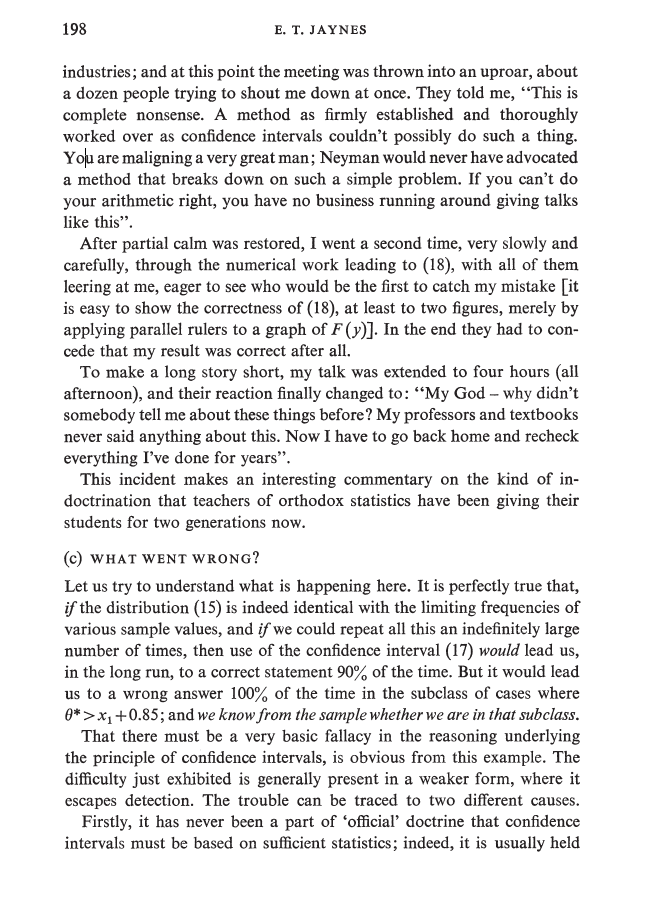

x = (12, 14, 16) = (12, 14, 16)
n = length(x) = 3
α = 0.1 = 0.1
dist_y = Gamma(n, 1 / n) = Gamma{Float64}(α=3.0, θ=0.3333333333333333)
y_int = hdi(dist_y, α) = [0.14710896409415852, 1.8263915697442574]
cdf(dist_y, y_int[end]) - cdf(dist_y, y_int[begin]) = 0.9
pdf(dist_y, y_int[end]) ≈ pdf(dist_y, y_int[begin]) = true
confint_jaynes = confint_truncexp_jaynes(x, α) = [12.173608430255742, 13.852891035905841]


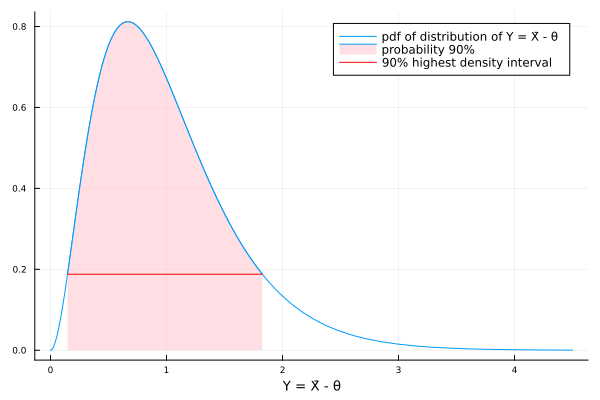

In [4]:
function hdi(dist::ContinuousUnivariateDistribution, α = 0.05; alg = Brent())
    f(p) = quantile(dist, p + (1 - α)) - quantile(dist, p)
    o = optimize(f, 0, α, alg)
    p = o.minimizer
    quantile.(dist, [p, p + (1 - α)])
end

function confint_truncexp_jaynes(x, α = 0.05; alg=Brent())
    n = length(x)
    dist_y = Gamma(n, 1/n)
    y_int = hdi(dist_y, α; alg)
    mean(x) .- reverse(y_int)
end

@show x = (12, 14, 16)
@show n = length(x)
@show α = 0.10
@show dist_y = Gamma(n, 1/n);
@show y_int = hdi(dist_y, α)
@show cdf(dist_y, y_int[end]) - cdf(dist_y, y_int[begin])
@show pdf(dist_y, y_int[end]) ≈ pdf(dist_y, y_int[begin])
@show confint_jaynes = confint_truncexp_jaynes(x, α)

plot(y -> pdf(dist_y, y), 0, 4.5; label="pdf of distribution of Y = X̄ - θ")
plot!(y -> pdf(dist_y, y), y_int...;
    label="probability 90%", c=1, fc=:pink, fa=0.5, fillrange=0)
plot!(y_int, pdf.(dist_y, y_int);
    label="90% highest density interval", c=:red)
plot!(xguide="Y = X̄ - θ")

[Frequentism and Bayesianism III](http://jakevdp.github.io/blog/2014/06/12/frequentism-and-bayesianism-3-confidence-credibility/) では $x=(10, 12, 15)$ の場合を扱っており, exact版の95%信頼区間の計算結果は $[10.2, 12.2]$ である.

In [5]:
@show hdi(Gamma(3, 1/3), 0.05)
@show mean((10, 12, 15))
@show confint_truncexp_jaynes((10, 12, 15), 0.05);

hdi(Gamma(3, 1 / 3), 0.05) = [0.10116685354387298, 2.133740683353059]
mean((10, 12, 15)) = 12.333333333333334
confint_truncexp_jaynes((10, 12, 15), 0.05) = [10.199592649980275, 12.232166479789461]


## 適切な信頼区間の構成法

前節と同様に確率変数 $X=(X_1,\ldots,X_n)$ が従う分布の確率密度函数は $p(x|\theta)$ であると仮定する.

Jaynesの誤りは標本平均 $\bar{X}$ の分布を信頼区間の構成に安易に用いたことである.

その代わりに標本中の最小値 $\min(X)$ の分布を使えば, より適切な信頼区間が得られ, そのようにして得られた信頼区間が平坦事前分布から得られるBayesianな信用区間にぴったり一致することも確かめられる.

$X_1 \sim \theta + \op{Exponential}(1)$ より, $X_1\ge t$ となる確率は

$$
P(X_1 \ge t|\theta) = \begin{cases}
1 & (t \le \theta) \\
e^{-(t-\theta)} & (t \ge \theta) \\
\end{cases}
$$

になる.  ゆえに, $\min(X) \ge t$ となる確率は次のようになる:

$$
P(\min(X)\ge t|\theta) = P(X_1\ge t|\theta)\cdots P(X_n\ge t|\theta) =
P(X_1\ge t|\theta)^n = \begin{cases}
1 & (t \le \theta) \\
e^{-n(t-\theta)} & (t \ge \theta). \\
\end{cases}
$$

したがって, 確率変数 $T = \min(X)$ が従う分布の確率密度函数は次のようになる:

$$
p(t|\theta) = -\frac{\partial}{\partial t}P(\min(X)\ge t|\theta) =
\begin{cases}
0 & (t < \theta) \\
ne^{-n(t-\theta)} & (t > \theta). \\
\end{cases}
$$

以上の結果は次が成立していることを意味している:

$$
\min(X) \sim \theta + \op{Exponential}(1/n).
$$

この結果とデータ $x$ と平坦事前分布から得られる $\theta$ の事後分布が

$$
\theta \sim \min(x) - \op{Exponential}(1/n).
$$

になることとの類似性に注意せよ.

P値の一般的(かつ大雑把)な定義は「統計モデル内でデータの数値以上に極端な値が生じる確率(もしくはその近似値)」であった.

Jaynesが採用した信頼区間はこれを「切断指数分布モデル内でデータの数値 $\bar{x}-1$ 以上に $\bar{X}-1$ の値が $\theta$ から離れる確率」と解釈した場合に対応している.  その解釈は適切ではない.

ここでは, P値を「切断指数分布モデル内でデータの数値 $\min(x)$ 以上に $\min(X)$ の値が $\theta$ から離れる確率」によって定義しよう:

$$
\op{pvalue}(x|\theta) =
\begin{Bmatrix}
P(\min(X)\le\min(x)|\theta) & (\min(x) < \theta) \\
P(\min(X)\ge\min(x)|\theta) & (\min(x) \ge \theta) \\
\end{Bmatrix} =
\begin{cases}
0 & (\min(x) < \theta) \\
e^{-n(\min(x)-\theta)} & (\min(x) \ge \theta). \\
\end{cases}
$$

$c\ge 0$ が $e^{-nc} = \alpha$ によって定義されていたことより, このP値の定義に対応する $100(1-\alpha)\%$ 信頼区間は次のように書ける:

$$
\op{confint}(x|\alpha) = \{\,\theta\in\R\mid \op{pvalue}(x|\theta)\ge \alpha\,\} =
[\min(x) - c, \min(x)].
$$

この信頼区間は平坦事前分布から得られるBayesianな信用区間にぴったり一致している.

平坦事前分布のBayes統計の結果が非Bayesianの場合の対応する結果にぴったり一致する場合が少なくないが, この場合もそのような場合の例になっている.

α = 0.1 = 0.1
confint = confint_truncexp(x, α) = [11.232471635668652, 12.0]
credint = credint_truncexp(x, α) = [11.232471635668652, 12.0]


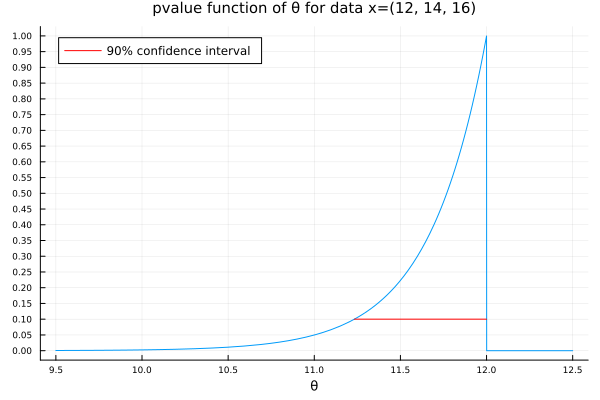

In [6]:
function pvalue_truncexp(x, θ)
    n, t = length(x), minimum(x)
    t < θ ? float(zero(θ)) : exp(-n*(t - θ))
end

function confint_truncexp(x, α = 0.05)
    n, t = length(x), minimum(x)
    c = -(1/n)*log(α)
    [t - c, t]
end

x = (12, 14, 16)
@show α = 0.10
@show confint = confint_truncexp(x, α)
@show credint = credint_truncexp(x, α)

P_pval = plot()
plot!(θ -> pvalue_truncexp(x, θ), 9.5, 12.5; label="")
title!("pvalue function of θ for data x=$x")
plot!(xguide="θ", ytick=0:0.05:1)
plot!(confint, fill(α, 2); label="90% confidence interval", c=:red)
plot!(legend=:topleft)

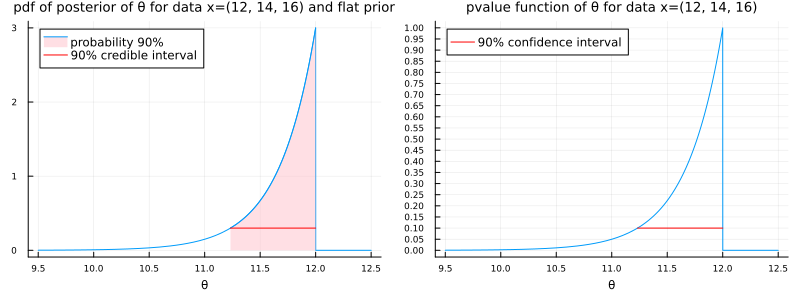

In [7]:
plot(P_post, P_pval; size=(800, 300))
plot!(titlefontsize=9, guidefontsize=8, bottommargin=4Plots.mm)